In [33]:
import numpy as np
import time
from scipy.linalg import schur  # Импортируем функцию разложения Шура
import matplotlib.pyplot as plt

# Вспомогательные функции для алгоритма Штрассена
def split_matrix(A):
    # Разделение матрицы 3x3 на 2x2 и 1x1 блоки
    A11 = A[:2, :2]
    A12 = A[:2, 2:]
    A21 = A[2:, :2]
    A22 = A[2:, 2:]
    return A11, A12, A21, A22

def combine_matrix(A11, A12, A21, A22):
    # Составляем 3x3 матрицу из блоков
    top = np.hstack((A11, A12))
    bottom = np.hstack((A21, A22))
    return np.vstack((top, bottom))

# Алгоритм умножения матриц с использованием алгоритма Штрассена
def strassen_matrix_multiply(A, B):
    # Для матриц размерности 3x3 используем стандартное умножение, если блоки не 2x2
    if A.shape[0] == 3 and B.shape[0] == 3:
        return np.dot(A, B)

    # Разбиваем матрицы A и B на блоки
    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)
    
    # Применяем алгоритм Штрассена для умножения
    M1 = strassen_matrix_multiply(A11 + A22, B11 + B22)
    M2 = strassen_matrix_multiply(A21 + A22, B11)
    M3 = strassen_matrix_multiply(A11, B12 - B22)
    M4 = strassen_matrix_multiply(A22, B21 - B11)
    M5 = strassen_matrix_multiply(A11 + A12, B22)
    M6 = strassen_matrix_multiply(A21 - A11, B11 + B12)
    M7 = strassen_matrix_multiply(A12 - A22, B21 + B22)
    
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6
    
    # Собираем результат
    return combine_matrix(C11, C12, C21, C22)

# Алгоритм возведения матрицы в степень с использованием Штрассена
def matrix_power_strassen(A, n):
    result = np.eye(A.shape[0])  # Единичная матрица
    base = A.copy()

    while n > 0:
        if n % 2 == 1:
            result = strassen_matrix_multiply(result, base)
        base = strassen_matrix_multiply(base, base)
        n //= 2

    return result




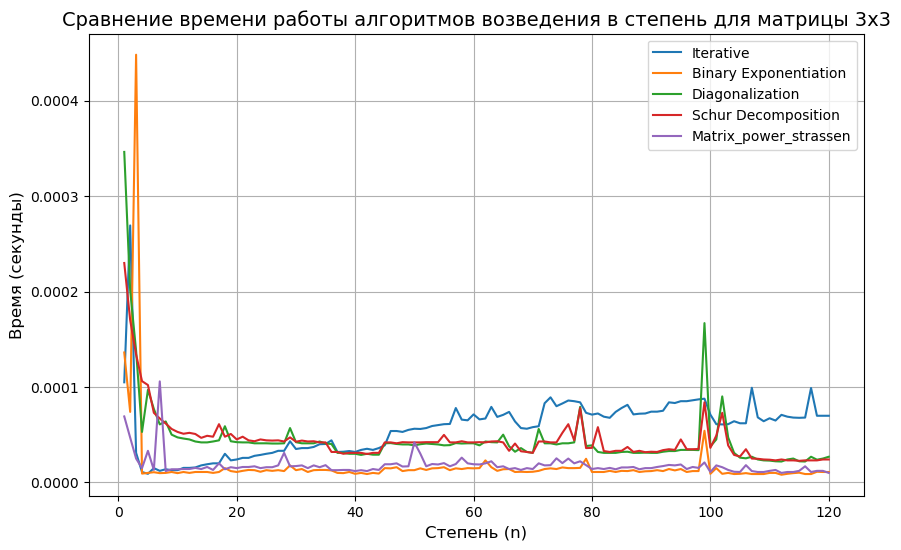

In [34]:
# 1. Прямое умножение (итеративный метод)
def matrix_power_iterative(A, n):
    result = np.eye(A.shape[0])
    for _ in range(n):
        result = np.dot(result, A)
    return result

# 2. Быстрое возведение в степень (метод бинарного возведения)
def matrix_power_binary(A, n):
    result = np.eye(A.shape[0])
    base = A.copy()
    
    while n > 0:
        if n % 2 == 1:
            result = np.dot(result, base)
        base = np.dot(base, base)
        n //= 2

    return result

# 3. Диагонализация (для диагонализируемых матриц)
def matrix_power_diagonalize(A, n):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    D_n = np.diag([val**n for val in eigenvalues])
    return np.dot(np.dot(eigenvectors, D_n), np.linalg.inv(eigenvectors))

# 4. Разложение Шура
def matrix_power_schur(A, n):
    # Используем функцию schur из scipy для разложения A = Q T Q^{-1}
    Q, T = schur(A)
    
    # Возводим верхнюю треугольную матрицу T в степень n
    T_n = np.diag([t**n for t in np.diagonal(T)])
    
    # Возвращаем результат A^n = Q T^n Q^{-1}
    return np.dot(np.dot(Q, T_n), np.linalg.inv(Q))


# Создание случайной матрицы A и степени n
A = np.random.rand(3, 3)
n = 5  # Степень, в которую будем возводить

# Функция для измерения времени работы алгоритмов
def measure_time(func, A, n):
    start_time = time.time()
    func(A, n)
    end_time = time.time()
    return end_time - start_time

# Сравнение времени работы всех алгоритмов
algorithms = [
    ("Iterative", matrix_power_iterative),
    ("Binary Exponentiation", matrix_power_binary),
    ("Diagonalization", matrix_power_diagonalize),
    ("Schur Decomposition", matrix_power_schur),
    ("Matrix_power_strassen", matrix_power_strassen)
]


# Сравнение времени работы всех алгоритмов для разных степеней
def compare_algorithms_for_different_powers(A, max_n):
    n_values = list(range(1, max_n + 1))
    times = {name: [] for name, _ in algorithms}

    for n in n_values:
        for name, func in algorithms:
            time_taken = measure_time(func, A, n)
            times[name].append(time_taken)
    
    return n_values, times


# Максимальная степень для сравнения
max_n = 120




# Получение данных для графика
n_values, times = compare_algorithms_for_different_powers(A, max_n)

# Построение графика
plt.figure(figsize=(10, 6))

for name, _ in algorithms:
    plt.plot(n_values, times[name], label=name)

plt.xlabel("Степень (n)", fontsize=12)
plt.ylabel("Время (секунды)", fontsize=12)
plt.title("Сравнение времени работы алгоритмов возведения в степень для матрицы 3x3", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

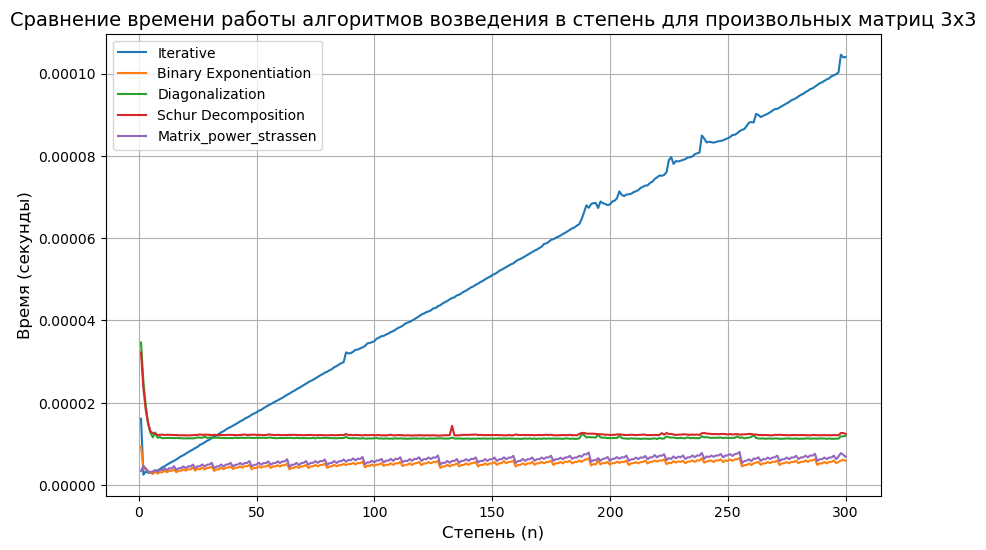

In [35]:

# Сравнение времени работы всех алгоритмов для разных степеней
def compare_algorithms_for_different_powers(A, max_n, k):
    n_values = list(range(1, max_n + 1))
    times = {name: [] for name, _ in algorithms}

    for n in n_values:
        # Усредняем время работы для k разных матриц
        for name, func in algorithms:
            total_time = 0
            for _ in range(k):
                time_taken = measure_time(func, A, n)
                total_time += time_taken
            avg_time = total_time / k
            times[name].append(avg_time)
    
    return n_values, times

# Создание случайных матриц A
k = 300  # Количество случайных матриц для усреднения
A = np.random.rand(3, 3)

# Список алгоритмов для сравнения
algorithms = [
    ("Iterative", matrix_power_iterative),
    ("Binary Exponentiation", matrix_power_binary),
    ("Diagonalization", matrix_power_diagonalize),
    ("Schur Decomposition", matrix_power_schur),
    ("Matrix_power_strassen", matrix_power_strassen)
]

# Максимальная степень для сравнения
max_n = 300

# Получение данных для графика
n_values, times = compare_algorithms_for_different_powers(A, max_n, k)

# Построение графика
plt.figure(figsize=(10, 6))

for name, _ in algorithms:
    plt.plot(n_values, times[name], label=name)

plt.xlabel("Степень (n)", fontsize=12)
plt.ylabel("Время (секунды)", fontsize=12)
plt.title("Сравнение времени работы алгоритмов возведения в степень для произвольных матриц 3x3", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


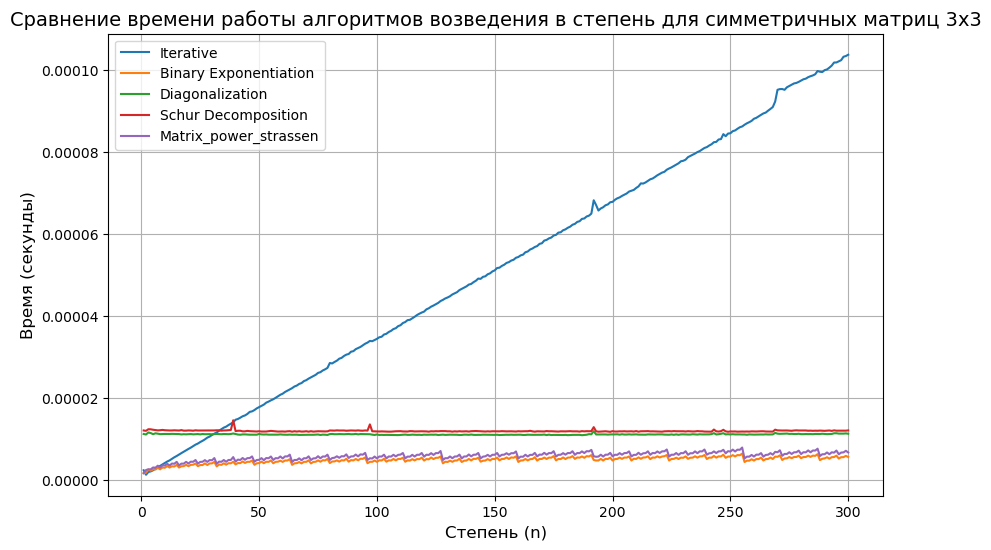

In [36]:
#simmetric matrix

# Создание случайной симметричной матрицы 3x3
A = np.random.rand(3, 3)

# Симметризация матрицы
A_symmetric = (A + A.T) / 2

# Получение данных для графика
n_values, times = compare_algorithms_for_different_powers(A_symmetric, max_n, k)

# Построение графика
plt.figure(figsize=(10, 6))

for name, _ in algorithms:
    plt.plot(n_values, times[name], label=name)

plt.xlabel("Степень (n)", fontsize=12)
plt.ylabel("Время (секунды)", fontsize=12)
plt.title("Сравнение времени работы алгоритмов возведения в степень для симметричных матриц 3x3", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

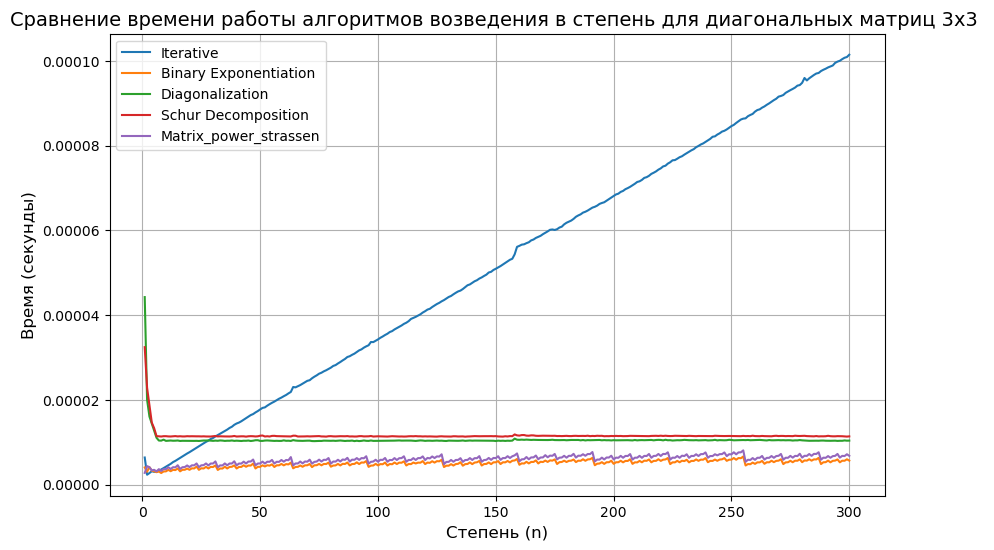

In [37]:
#diag matrix

# Диагональные элементы
diagonal_elements = np.random.rand(3)

# Создание диагональной матрицы
A_diagonal = np.diag(diagonal_elements)


# Получение данных для графика
n_values, times = compare_algorithms_for_different_powers(A_diagonal, max_n, k)

# Построение графика
plt.figure(figsize=(10, 6))

for name, _ in algorithms:
    plt.plot(n_values, times[name], label=name)

plt.xlabel("Степень (n)", fontsize=12)
plt.ylabel("Время (секунды)", fontsize=12)
plt.title("Сравнение времени работы алгоритмов возведения в степень для диагональных матриц 3x3 ", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()